In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

from statsmodels.graphics.api import qqplot

import pmdarima as pm
from pmdarima.model_selection import train_test_split

,countrycode,country,currency_unit,rgdpe,rgdpo,pop,emp,avh,hc,ccon,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
year,,,,,,,,,,,,,,,,,,,,,
2019-01-01,NLD,Netherlands,Euro,1113163.750,1128837.875,17.537507,9.679247,1456.55,3.396878,708258.6250,...,0.908008,-0.842570,0.032986,0.841805,0.708291,1.011620,0.576382,0.554458,0.623172,0.754300
2020-01-01,NLD,Netherlands,Euro,1104162.500,1117582.625,17.636731,9.630330,1402.14,3.411170,702935.8750,...,0.867683,-0.796247,0.033422,0.844757,0.707651,1.035053,0.577881,0.556153,0.616733,0.740280
2021-01-01,NLD,Netherlands,Euro,1179366.625,1201645.375,17.730564,9.799188,1442.16,3.426000,748477.4375,...,0.905765,-0.824072,0.032492,0.901770,0.740692,1.073019,0.609531,0.600782,0.656091,0.784813
2022-01-01,NLD,Netherlands,Euro,1228416.750,1262114.625,17.904421,10.184714,1442.64,3.440973,787099.6250,...,0.956507,-0.874483,0.030716,0.861698,0.705829,1.008785,0.605068,0.607997,0.619581,0.716050
2023-01-01,NLD,Netherlands,Euro,1239305.125,1263538.125,18.092524,10.356368,1438.74,3.456089,796532.1875,...,0.902725,-0.810712,0.036419,0.947474,0.764209,1.103312,0.654013,0.643171,0.663252,0.727596


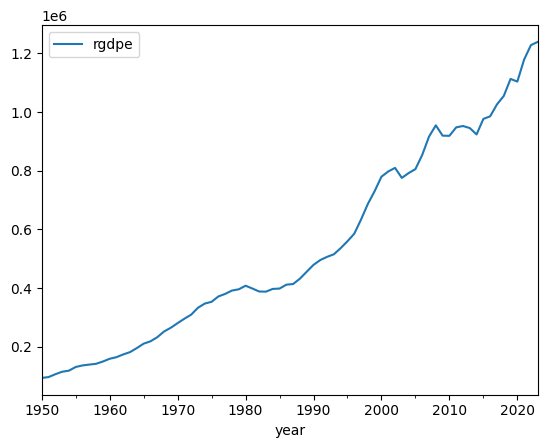

In [3]:
df = pd.read_csv("cleaned_v11.csv", parse_dates=["year"])
df = df[df['country'] == "Netherlands"]

# transform data to have year as index
df.set_index('year', inplace=True)
df.head()

df.plot(y='rgdpe', use_index=True)

df.tail()

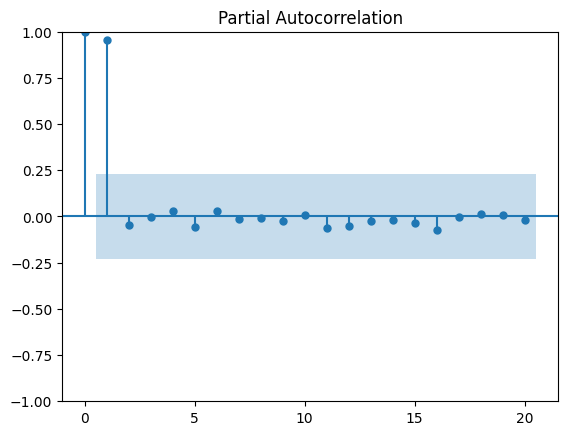

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1337.635, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1343.045, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1337.041, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1337.377, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1371.320, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1338.646, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1338.386, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1341.024, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1345.772, Time=0.01 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.190 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   61
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -665.521
Date:                Fri, 28 Nov 2025   AIC      

In [4]:
sm.graphics.tsa.plot_pacf(df['rgdpe'].values.squeeze(), lags=20)
plt.show()
# split between train 1950-2010 and 2011-2023
train = df['rgdpe']['1950':'2010']
test = df['rgdpe']['2011':'2023']
model = pm.auto_arima(train, seasonal=False, trace=True)
print(model.summary())

In [5]:
arma_mod20 = ARIMA(df['rgdpe'], order=(2, 0, 0)).fit()

arma_mod30 = ARIMA(df['rgdpe'], order=(3, 0, 0)).fit()
print(arma_mod20.summary())


                               SARIMAX Results                                
Dep. Variable:                  rgdpe   No. Observations:                   74
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -845.824
Date:                Fri, 28 Nov 2025   AIC                           1699.648
Time:                        14:03:20   BIC                           1708.865
Sample:                    01-01-1950   HQIC                          1703.325
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.348e+05   2.88e-11   1.86e+16      0.000    5.35e+05    5.35e+05
ar.L1          1.5390      0.089     17.253      0.000       1.364       1.714
ar.L2         -0.5406      0.090     -5.979      0.0

c:\Users\storm\OneDrive - Hogeschool Rotterdam\Jaar 4 PC\Project\datascience-project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\storm\OneDrive - Hogeschool Rotterdam\Jaar 4 PC\Project\datascience-project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\storm\OneDrive - Hogeschool Rotterdam\Jaar 4 PC\Project\datascience-project\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\storm\OneDrive - Hogeschool Rotterdam\Jaar 4 PC\Project\datascience-project\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoreg

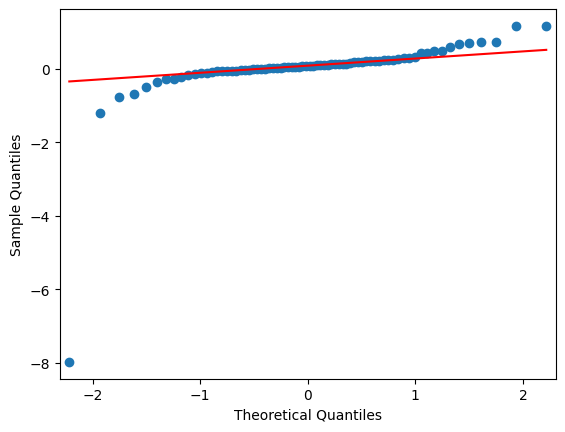

In [6]:
resid = arma_mod30.resid

stats.normaltest(resid)

## QQ-plot of residuals
fig = qqplot(resid, line='q', fit=True)
plt.show()



2011-01-01    926055.95
2012-01-01    935665.28
2013-01-01    946265.71
2014-01-01    957225.12
2015-01-01    968314.56
2016-01-01    979451.09
2017-01-01    990604.69
2018-01-01   1001764.46
2019-01-01   1012926.47
2020-01-01   1024089.29
2021-01-01   1035252.40
2022-01-01   1046415.62
2023-01-01   1057578.88
2024-01-01   1068742.15
2025-01-01   1079905.43
2026-01-01   1091068.71
2027-01-01   1102231.99
2028-01-01   1113395.27
Freq: YS-JAN, dtype: float64


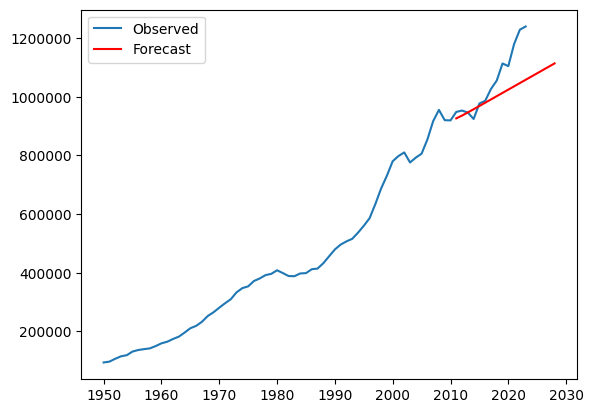

 Mean Squared Error: 8420869177.009902
 Root Mean Squared Error: 91765.29396787165


In [13]:
# predict 1990 to 2010 and plot observed vs predicted


plt.plot(df['rgdpe'], label='Observed')
#predict_rdgpo.plot(label='Forecast')
# forecast using model
forecasts = model.predict(n_periods=test.shape[0] + 5)
print(forecasts)
# create date range for forecasts
forecast_dates = pd.date_range(start='2011', periods=test.shape[0] + 5, freq='YS')
# plot forecasts
plt.ticklabel_format(style='plain', axis='y')
plt.plot(forecast_dates, forecasts, label='Forecast', color='red')
plt.legend()
plt.show()
# get rid of 1e6, format y-axis normally
# get mean squared error
mse = ((forecasts[:test.shape[0]] - df['rgdpe']['2011':'2023']) ** 2).mean()
print(f' Mean Squared Error: {mse}')
# get root mean squared error
rmse = np.sqrt(mse)
print(f' Root Mean Squared Error: {rmse}')




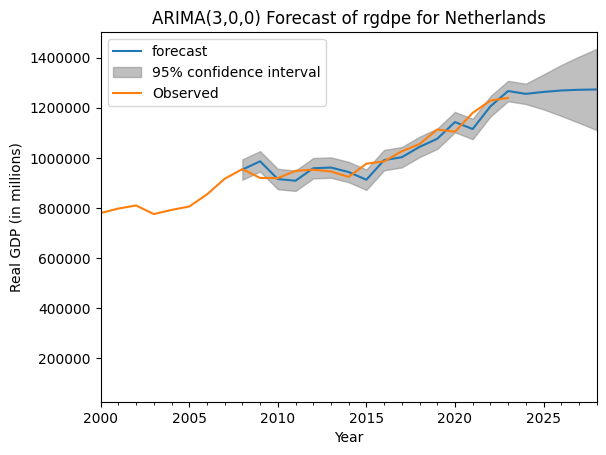

In [8]:
# forecast to 2028, include confidence intervals as grey area around forecast
plot_predict(arma_mod30, start='2008', end='2028', ax=None)
df['rgdpe'].plot(label='Observed')
# make sure plot only shows from 2000 onwards
plt.xlim(['2000', '2028'])
# get rid of 1e6 notation on y-axis
plt.ticklabel_format(style='plain', axis='y')
# add title and labels
plt.title('ARIMA(3,0,0) Forecast of rgdpe for Netherlands')
plt.xlabel('Year')
plt.ylabel('Real GDP (in millions)')
plt.legend()
plt.show()  